In [2]:
from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/data/생육.zip -d /content/data
!pip install tslearn
!pip install streamlit
!npm install localtunnel

Mounted at /content/drive
Archive:  /content/drive/MyDrive/data/생육.zip
  inflating: /content/data/strawberry.csv  
  inflating: /content/data/tomatoes.csv  
   creating: /content/data/sample_data/
  inflating: /content/data/sample_data/PF_0022131_01.xlsx  
   creating: /content/data/생육/
  inflating: /content/data/생육/딸기_2018_생육_통합.csv  
  inflating: /content/data/생육/딸기_2019_생육_통합.csv  
  inflating: /content/data/생육/딸기_2020_생육_통합.csv  
  inflating: /content/data/생육/딸기_2021_생육_통합.csv  
  inflating: /content/data/생육/방울토마토_2018_생육_통합.csv  
  inflating: /content/data/생육/방울토마토_2019_생육_통합.csv  
  inflating: /content/data/생육/방울토마토_2020_생육_통합.csv  
  inflating: /content/data/생육/방울토마토_2021_생육_통합.csv  
  inflating: /content/data/생육/오이_2018_생육_통합.csv  
  inflating: /content/data/생육/오이_2019_생육_통합.csv  
  inflating: /content/data/생육/오이_2020_생육_통합.csv  
  inflating: /content/data/생육/오이_2021_생육_통합.csv  
  inflating: /content/data/생육/완숙토마토_2018_생육_통합.csv  
  inflating: /content/data/생육/완숙토마토_2019_생육

In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import os
# import warnings
# from sklearn.preprocessing import LabelEncoder
# from tqdm import tqdm
# import re

# warnings.filterwarnings("ignore")
# os.chdir("/content/data/생육")

# list_dir = os.listdir()
# # 현재 폴더의 있는 파일들을 list_dir 변수에 넣는다.

# crop_dfs = {}

# # totals_df를 통해 농가명의 조사일자를 기준으로 주차를 만든다.(1주차, 2주차...)
# # label encoder를 통해 유니크한 조사일자 순으로 1주차, 2주차 이런식으로 만들어준다.
# def totals_df(data):
#     sigun = data['시군'].unique()
#     names = data['농가명'].unique()

#     totals = pd.DataFrame()

#     for s in sigun:
#         for j in names:
#             le = LabelEncoder()

#             df = data[(data['시군']==s) & (data['농가명']==j)]
#             df['주차'] = le.fit_transform(df['조사일자'])+1
#             df['주차'] = df['주차'].astype('int')

#             totals = pd.concat([totals, df])

#     return totals

# # list_dir에 있는 csv 파일들을 불러오면서 컬럼에 연도를 붙이고 품목마다 하나의 데이터 프레임으로 합친다.
# for file in tqdm(list_dir):
#     crop = file.split('_')[0]

#     year_match = re.search(r'\d{4}', file)
#     year = int(year_match.group()) if year_match else None

#     df = pd.read_csv(file, encoding='euc-kr')

#     df['crps_year'] = year

#     df = totals_df(df)

#     if crop not in crop_dfs:
#         crop_dfs[crop] = df
#     else:
#         crop_dfs[crop] = pd.concat([crop_dfs[crop], df], ignore_index=True)

# # cm 단위를 mm로 바꾸는 함수
# def convert_cm_to_mm(df, columns):
#     for col in columns:
#         if col in df.columns:
#             df[col] = pd.to_numeric(df[col], errors='coerce')
#             df[col] = df[col] * 10  # cm → mm
#     return df


# convert_columns = ['초장','엽장','엽폭','엽병장','관부직경','화방높이','생장길이'] # 바꿀 컬럼을 지정해준다.

# # for문을 통해 cm 단위를 mm단위로 바꾼다.
# for crop, df in crop_dfs.items():
#     crop_dfs[crop] = convert_cm_to_mm(df, convert_columns)

#     print(f"{crop}: {df.shape}")

# ### 출력 ###
# ## 딸기: (71237, 18)
# ## 방울토마토: (86106, 21)
# ## 오이: (4250, 19)
# ## 완숙토마토: (98379, 23)

# ## 파프리카: (130138, 19)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import re


list_sample_data = os.listdir("/content/data/sample_data")
sample_data = pd.read_excel(f'/content/data/sample_data/{list_sample_data[0]}', header=[0, 1, 2])
# 데이터를 불러오는데 위의 세줄(아까 언급했던 3개의 칼럼)에 대해서 모두 헤더 처리를 한다.
# 그럼 컬럼은 (초장(mm), 초장, PlantHeight) 이렇게 한 묶음이 된다.

def clean_column(col):
    return re.sub(r"\(.*?\)", "", col[0]).strip()
# 컬럼을 정리하는 함수인데 위에서 불러온 (초장(mm), 초장, PlantHeight)에서 첫번째만 불러와서
# "초장(mm)" 여기에서 "초장" 이렇게 바꿔주는 함수이다.

sample_data.columns = [clean_column(col) for col in sample_data.columns]
# 각 컬럼별로 적용한다.

CFG = {'crop_name':'딸기'}


def read_df(crop_name):
    if CFG['crop_name'] == '딸기':
        nogjinchoen_df = pd.read_csv('/content/data/strawberry.csv', encoding='cp949')
        hangmoks = ['초장','엽장','엽폭','엽수','엽병장','관부직경']
    elif CFG['crop_name'] == '완숙토마토':
        nogjinchoen_df = pd.read_csv('/content/data/tomatoes.csv', encoding='cp949')
        hangmoks = ['초장','생장길이','줄기굵기','엽장','엽폭','엽수','화방높이']
    elif CFG['crop_name'] == '방울토마토':
        nogjinchoen_df = pd.read_csv('/content/data/cherry_tomatoes.csv', encoding='cp949')
        hangmoks = ['초장','생장길이','줄기굵기','엽장','엽폭','엽수','화방높이']
    elif CFG['crop_name'] == '오이':
        nogjinchoen_df = pd.read_csv('/content/data/cucumber.csv', encoding='cp949')
        hangmoks = ['초장','마디수','줄기굵기','엽장','엽폭','엽수']
    elif CFG['crop_name'] == '파프리카':
        nogjinchoen_df = pd.read_csv('/content/data/paprika.csv', encoding='cp949')
        hangmoks = ['초장','생장길이','줄기굵기','엽장','엽폭','엽수']

    return nogjinchoen_df, hangmoks

nogjinchoen_df, hangmoks = read_df(CFG['crop_name'])
nogjinchoen_df

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
<ipython-input-5-a7883adba4d9>:30: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  nogjinchoen_df = pd.read_csv('/content/data/strawberry.csv', encoding='cp949')


,도,시군,품목,작기,농가명,조사일자,개체번호,액아구분,초장,엽수,엽장,엽폭,엽병장,관부직경,화방번호,화방별착과수,crps_year,주차
0,경남,거창,딸기,1,58,2018-10-16,1,본주,262.0,4.0,114.0,82.0,136.0,134.6,0.0,NaN,2018,1
1,경남,거창,딸기,1,58,2018-10-16,2,본주,252.0,4.0,103.0,73.0,148.0,120.2,0.0,NaN,2018,1
2,경남,거창,딸기,1,58,2018-10-16,3,본주,245.0,3.0,100.0,70.0,143.0,120.0,0.0,NaN,2018,1
3,경남,거창,딸기,1,58,2018-10-16,4,본주,303.0,4.0,100.0,74.0,175.0,126.6,0.0,NaN,2018,1
4,경남,거창,딸기,1,58,2018-10-26,1,본주,276.0,4.0,120.0,82.0,123.0,151.5,1.0,NaN,2018,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71232,충북,충주,딸기,1,22,2022-05-19,2,본주,273.0,18.0,72.0,64.0,142.0,96.5,4.0,6.0,2021,32
71233,충북,충주,딸기,1,22,2022-05-19,2,액아-2,331.0,30.0,88.0,66.0,217.0,102.6,NaN,NaN,2021,32
71234,충북,충주,딸기,1,22,2022-05-19,3,본주,328.0,30.0,76.0,68.0,244.0,113.8,4.0,7.0,2021,32
71235,충북,충주,딸기,1,22,2022-05-19,4,액아-1,331.0,18.0,77.0,63.0,182.0,102.4,2.0,5.0,2021,32


In [ ]:
from tslearn.metrics import dtw, dtw_path

dtw_total = pd.DataFrame()
# DTW 정보를 저장 할 데이터 프레임

for year in nogjinchoen_df['crps_year'].unique():
    temp = nogjinchoen_df[nogjinchoen_df['crps_year']==year]
    # 1번 항목으로 연도별로 농촌진흥청 데이터를 쪼갠다

    dtw_njc = temp.groupby(['주차'])[hangmoks].mean().reset_index() # # 농촌진흥청 데이터의 주차, 항목별 조사항목 퍙균값
    dtw_njc_min = temp.groupby(['주차'])[hangmoks].min().reset_index() # 농촌진흥청 데이터의 주차, 항목별 조사항목 최소값
    dtw_njc_max = temp.groupby(['주차'])[hangmoks].max().reset_index() # 농촌진흥청 데이터의 주차, 항목별 조사항목 최대값
    dtw_njc.fillna(method='bfill',inplace=True)
    dtw_njc_min.fillna(method='bfill',inplace=True)
    dtw_njc_max.fillna(method='bfill',inplace=True)

    print(dtw_njc.shape)
    # 2번 항목으로 농촌진흥청 데이터의 조사항목별 최소, 평균, 최대값 산출

    dtw_distance = []
    dtw_max_distance = []
    dtw_hangmoks = []
    # DTW의 거리, 최대거리, 조사항목을 넣을 리스트

    for hangmok in hangmoks:
    	# 3번과 4번 5번 항목으로 비교하려는 농가와 농촌진흥청의 주차를 맞춰준다.
        A = dtw_njc[(dtw_njc['주차']<=sample_data['주차'].max()) & (dtw_njc['주차']>=sample_data['주차'].min())][hangmok]
        ## 비교하려는 농가 주차의 최대값과 최소값을 찾아서 그 범위에 있는 농촌진흥청 데이터를 추출하여 A라는 변수에 넣는다.(농촌진흥청 주차, 조사항목별 평균데이터)

        A_max = dtw_njc_max[(dtw_njc_max['주차']<=sample_data['주차'].max()) & (dtw_njc_max['주차']>=sample_data['주차'].min())][hangmok]
        A_min = dtw_njc_min[(dtw_njc_min['주차']<=sample_data['주차'].max()) & (dtw_njc_min['주차']>=sample_data['주차'].min())][hangmok]
        ## 비교하려는 농가 주차의 최대값과 최소값을 찾아서 그 범위에 있는 농촌진흥청 데이터를 추출하여 A라는 변수에 넣는다.(농촌진흥청 주차, 조사항목별 최소, 최대 데이터)


        B = sample_data.groupby(['주차'])[hangmok].mean()
        ## 비교하는 농가의 주차 조사항목별 평균 데이터

        path ,distance = dtw_path(A, B)
        max_path, max_distance = dtw_path(A_max, A_min)
        ## path = 조사하려는 농가와 농촌진흥청 데이터의 DTW
        ## max_path = 농촌진흥청 최소 데이터와 농촌진흥청 최대 데이터의 DTW(최악의 DTW결과)

        dtw_distance.append(distance)
        dtw_max_distance.append(max_distance)
        dtw_hangmoks.append(hangmok)

    dtw_df = pd.DataFrame({'항목':hangmoks,
                           '거리':dtw_distance,
                           '최대거리':dtw_max_distance})
    # dtw_df를 만들고 데이터프레임으로 만들어줌

    dtw_df['years'] = year
    dtw_total = pd.concat([dtw_total, dtw_df])
    # dtw_total에 dtw_df를 계속 넣어줌

dtw_calc = dtw_total.groupby(['항목'])[['거리','최대거리']].mean()
# 6번 항목으로 연도별로 dtw_total에 있는 것을 하나의 평균으로 통합

dtw_calc['생육유사도'] = round((1-(dtw_calc['거리']/dtw_calc['최대거리']))*100,2)
dtw_calc = dtw_calc.reset_index()
# 7번 항목으로 생육유사도 측정
## 생육유사도 = (1 - (각 조사항목별 거리 / 각 조사항목별 최대거리))*100 이고 소수점 2자리까지 반올림

(38, 7)
(38, 7)
(38, 7)
(40, 7)


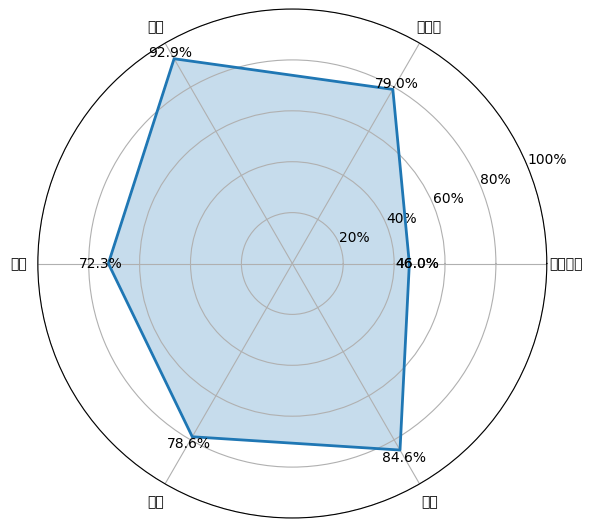

In [ ]:
hangmoks = dtw_calc['항목'].tolist()
similarities = dtw_calc['생육유사도'].tolist()

angles = np.linspace(0, 2 * np.pi, len(hangmoks), endpoint=False).tolist()
similarities += similarities[:1]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, similarities, color='tab:blue', linewidth=2)
ax.fill(angles, similarities, color='tab:blue', alpha=0.25)

for angle, sim in zip(angles, similarities):
    ax.text(angle, sim + 3, f'{sim:.1f}%', ha='center', va='center', fontsize=10)

ax.set_yticks([20, 40, 60, 80, 100])
ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(hangmoks, fontproperties="Malgun Gothic")

plt.tight_layout()
plt.show()

In [18]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
import os
import re
from tslearn.metrics import dtw_path
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# 설정
DATA_DIR = "data"

# 컬럼 정리 함수
def clean_column(col):
    return re.sub(r"\(.*?\)", "", col[0]).strip()

# DTW 계산 함수
def calculate_dtw(njc_df, sample_df, hangmoks):
    dtw_total = pd.DataFrame()

    for year in njc_df['crps_year'].unique():
        temp = njc_df[njc_df['crps_year'] == year]

        njc_mean = temp.groupby('주차')[hangmoks].mean().reset_index()
        njc_min = temp.groupby('주차')[hangmoks].min().reset_index()
        njc_max = temp.groupby('주차')[hangmoks].max().reset_index()

        njc_mean.fillna(method='bfill', inplace=True)
        njc_min.fillna(method='bfill', inplace=True)
        njc_max.fillna(method='bfill', inplace=True)

        dtw_distance = []
        dtw_max_distance = []

        for hangmok in hangmoks:
            try:
                A = njc_mean[(njc_mean['주차'] >= sample_df['주차'].min()) & (njc_mean['주차'] <= sample_df['주차'].max())][hangmok]
                A_max = njc_max[(njc_max['주차'] >= sample_df['주차'].min()) & (njc_max['주차'] <= sample_df['주차'].max())][hangmok]
                A_min = njc_min[(njc_min['주차'] >= sample_df['주차'].min()) & (njc_min['주차'] <= sample_df['주차'].max())][hangmok]
                B = sample_df.groupby('주차')[hangmok].mean()

                _, distance = dtw_path(A.values, B.values)
                _, max_distance = dtw_path(A_max.values, A_min.values)

                dtw_distance.append(distance)
                dtw_max_distance.append(max_distance)
            except Exception as e:
                dtw_distance.append(np.nan)
                dtw_max_distance.append(np.nan)

        dtw_df = pd.DataFrame({
            '항목': hangmoks,
            '거리': dtw_distance,
            '최대거리': dtw_max_distance,
            '연도': year
        })

        dtw_total = pd.concat([dtw_total, dtw_df])

    dtw_calc = dtw_total.groupby('항목')[['거리', '최대거리']].mean()
    dtw_calc['생육유사도(%)'] = round((1 - dtw_calc['거리'] / dtw_calc['최대거리']) * 100, 2)
    return dtw_calc.reset_index()


# Streamlit 앱
st.title("🌱 생육 유사도 비교")

st.sidebar.header("📤 샘플 Excel 업로드")
uploaded_file = st.sidebar.file_uploader("엑셀 파일을 선택하세요", type=["xlsx"])

# 업로드 안내 메시지
if not uploaded_file:
    st.info('''👈 왼쪽 사이드바에서 샘플 Excel 파일을 업로드해주세요.  \n  \n
    ⚠️딸기, 완숙토마토, 방울토마토, 오이, 파프리카 품목만 생육유사도 측정이 가능합니다.''')

# 2. 샘플 Excel 업로드
if uploaded_file:
    progress = st.progress(0, text="📊 파일 처리 중입니다...")

    # 1단계: 샘플 데이터 읽기
    sample_df = pd.read_excel(uploaded_file, header=[0, 1, 2])
    sample_df = sample_df[sample_df.columns[:-1]]  # 마지막 열 제거
    sample_df.columns = [clean_column(col) for col in sample_df.columns]
    sample_df = sample_df.rename(columns={'줄기직경': '줄기굵기'})

    progress.progress(10, text="✅ 컬럼 정리 완료")

    if '주차' not in sample_df.columns:
        st.error("샘플 데이터에 '주차' 열이 있어야 합니다.")
        progress.empty()
    else:
        # 2단계: 작물 자동 인식
        crop_mapping = {
            '딸기': ('strawberry.csv', ['초장','엽장','엽폭','엽수','엽병장','관부직경']),
            '완숙토마토': ('tomatoes.csv', ['생장길이','줄기굵기','엽장','엽폭','엽수','화방높이']),
            '방울토마토': ('cherry_tomatoes.csv', ['생장길이','줄기굵기','엽장','엽폭','엽수','화방높이']),
            '오이': ('cucumber.csv', ['초장','마디수','줄기굵기','엽장','엽폭','엽수']),
            '파프리카': ('paprika.csv', ['생장길이','줄기굵기','엽장','엽폭','엽수','개화마디','착과마디']),
        }

        # 작물 일치율 계산 방식으로 개선
        matched_crops = []
        for crop_name, (_, crop_hangmoks) in crop_mapping.items():
            matched = [h for h in crop_hangmoks if h in sample_df.columns]
            match_ratio = len(matched) / len(crop_hangmoks)
            matched_crops.append({
                "name": crop_name,
                "matched_count": len(matched),
                "total_required": len(crop_hangmoks),
                "match_ratio": match_ratio
            })

        # 1순위: 일치 개수 > 2순위: 일치율 기준 정렬
        matched_crops.sort(key=lambda x: (x["matched_count"], x["match_ratio"]), reverse=True)

        # 최상위 일치 작물 추출
        top_match_count = matched_crops[0]['matched_count']

        # 최소 일치 개수 조건 확인 (예: 3개 이상)
        if top_match_count < 3:
            st.error("업로드된 파일이 어떤 작물에도 해당하지 않습니다.")
            progress.empty()
        else:
            # 동일한 matched_count를 가진 후보군 추출
            top_candidates = [c for c in matched_crops if c['matched_count'] == top_match_count]

            if len(top_candidates) == 1:
                crop = top_candidates[0]['name']
                st.success(f"자동 인식된 작물: {crop}")
            else:
                crop_names = [c['name'] for c in top_candidates]
                crop = st.selectbox("🔍 여러 작물이 유사하게 감지되었습니다. 작물을 선택해주세요:", crop_names)
                st.success(f"선택된 작물: {crop}")


            filename, hangmoks = crop_mapping[crop]
            njc_df = pd.read_csv(f"{DATA_DIR}/{filename}", encoding='cp949')

            progress.progress(40, text="📂 농진청 데이터 로딩 중...")

            sample_data = sample_df[['주차'] + [col for col in sample_df.columns if col in hangmoks]]

            progress.progress(60, text="🔄 DTW 유사도 계산 중...")

            dtw_result = calculate_dtw(njc_df, sample_data, hangmoks)

            progress.progress(80, text="📈 시각화 준비 중...")

            # --- 항목별 주차별 비교 시각화 ---
            st.subheader("📉 주차별 생육 비교 (사용자 데이터 vs 농진청 데이터)")

            tabs = st.tabs(hangmoks)

            for i, hangmok in enumerate(hangmoks):
                with tabs[i]:
                    # 샘플 데이터 평균
                    sample_grouped = sample_data.groupby('주차')[hangmok].mean().reset_index()

                    # NJC 데이터 평균 (최근 연도 기준)
                    recent_year = njc_df['crps_year'].max()
                    njc_filtered = njc_df[njc_df['crps_year'] == recent_year]
                    njc_grouped = njc_filtered.groupby('주차')[hangmok].mean().reset_index()

                    # plotly 그래프 생성
                    fig = go.Figure()

                    fig.add_trace(go.Scatter(
                        x=njc_grouped['주차'],
                        y=njc_grouped[hangmok],
                        mode='lines+markers',
                        name='농진청 평균',
                        marker=dict(color='green')
                    ))

                    fig.add_trace(go.Scatter(
                        x=sample_grouped['주차'],
                        y=sample_grouped[hangmok],
                        mode='lines+markers',
                        name='사용자 평균',
                        marker=dict(color='blue')
                    ))

                    fig.update_layout(
                        title=f"",
                        xaxis_title="주차",
                        yaxis_title=hangmok,
                        legend=dict(x=0.01, y=0.99),
                        height=400,
                        hovermode="x unified",       # 마우스 오버 시 x축 기준 통합 툴팁
                        title_font_size=1,          # 타이틀 폰트 크기
                        title_x=0.01,                 # 타이틀 가운데 정렬 (x축 기준)
                        title_y=0.9,                  # 타이틀 y 위치 조정
                        margin=dict(t=20)
                    )

                    st.plotly_chart(fig, use_container_width=True)
            progress.progress(90, text="주차별 생육비교 시각화 완료..")
            # 결과 출력 및 시각화를 좌우로 나누기
            # st.subheader("📊 생육 유사도 (DTW 기반)")

            col1, col2 = st.columns(2)

            with col1:
                st.markdown("#### 🔍 유사도 테이블")
                st.dataframe(dtw_result.reset_index(drop=True))

            progress.progress(95, text="유사도 테이블 완료..")



            with col2:
                st.markdown("#### 📈 유사도 시각화 (Radar Chart)")

                # 데이터 준비
                categories = dtw_result['항목'].tolist()
                values = dtw_result['생육유사도(%)'].tolist()

                # 레이더 차트 닫기 위해 첫 항목 반복
                categories += [categories[0]]
                values += [values[0]]

                # 레이더 차트 생성
                fig = go.Figure()

                fig.add_trace(go.Scatterpolar(
                    r=values,
                    theta=categories,
                    fill='toself',
                    name='생육유사도(%)',
                    line_color='skyblue',
                    hovertemplate='<b>%{theta}</b><br>유사도: %{r:.1f}%<extra></extra>'
                ))
                # 레이아웃 조정: 마진 최소화 + 크기 조절
                fig.update_layout(
                    polar=dict(
                        radialaxis=dict(
                            visible=True,
                            range=[0, 100],
                            tickfont=dict(size=10)  # 폰트도 조금 작게
                        ),
                        angularaxis=dict(
                            tickfont=dict(size=10)  # 각 항목 이름도 작게
                        )
                    ),
                    margin=dict(t=20, b=20, l=40, r=40),  # 여백 최소화
                    height=350,  # 높이 줄이기
                    showlegend=False
                )

                st.plotly_chart(fig, use_container_width=True)
        progress.progress(100, text="레이더 차트 완료!")
        progress.empty()


Overwriting app.py


In [19]:
!streamlit run /content/app.py &>/content/logs.txt & npx localtunnel --port 8501 & curl ipv4.icanhazip.com

35.233.131.157
⠙⠹your url is: https://soft-snails-tease.loca.lt
